## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

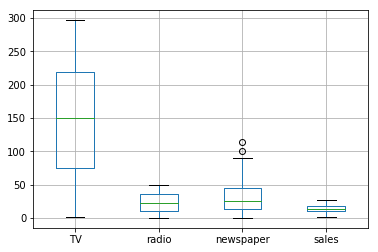

In [3]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

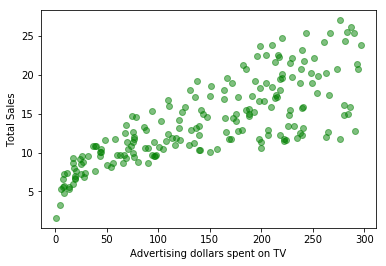

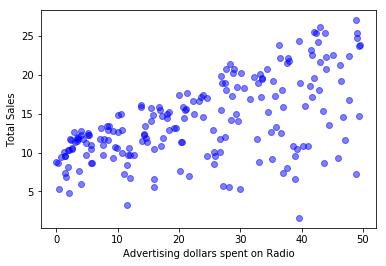

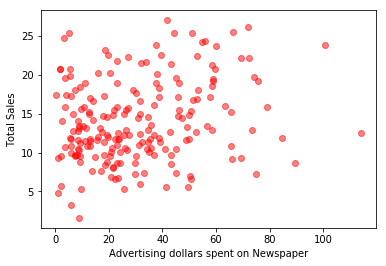

In [4]:
plt.scatter(df['TV'],df['sales'], alpha = 0.5, c = "g")
plt.xlabel("Advertising dollars spent on TV")
plt.ylabel("Total Sales")
plt.show()

plt.scatter(df['radio'],df['sales'], alpha = 0.5, c = "b")
plt.xlabel("Advertising dollars spent on Radio")
plt.ylabel("Total Sales")
plt.show()

plt.scatter(df['newspaper'],df['sales'], alpha = 0.5, c = "r")
plt.xlabel("Advertising dollars spent on Newspaper")
plt.ylabel("Total Sales")
plt.show()

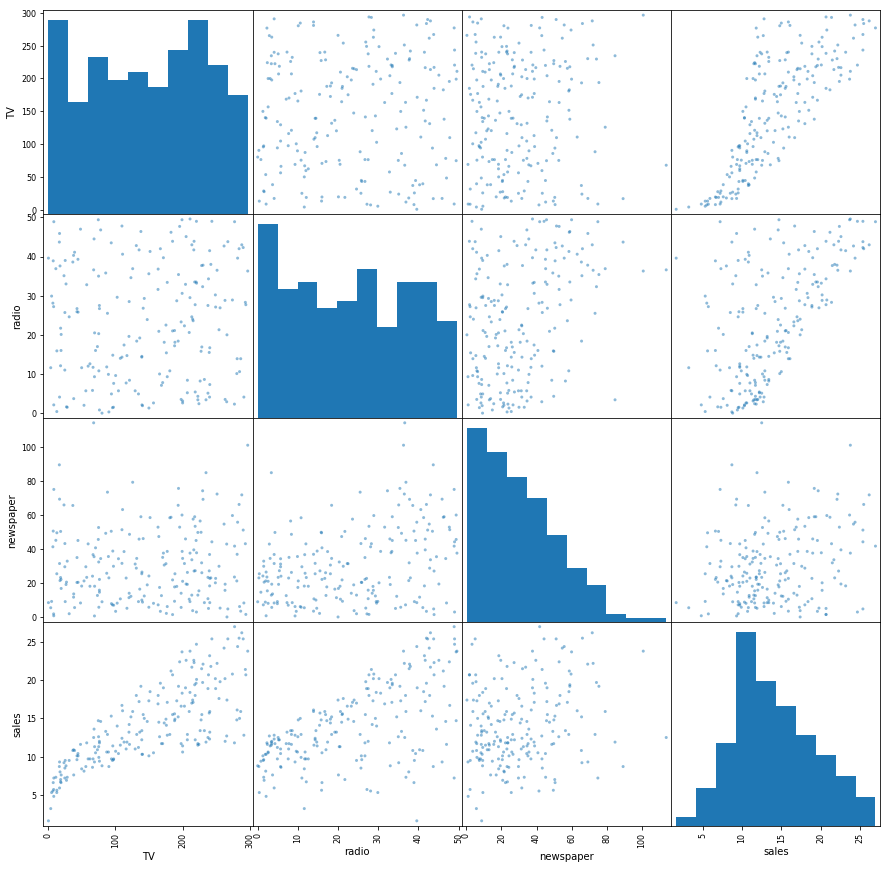

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15,15))
plt.show()

Which of the variables seem correlated with one another? Which don't? Explain your answer

From the scatter matrix, the advertising costs for TV, radio and newspaper do not seem to be correlated with one another. But radio and sales are positively correlated with each other, while TV and sales also have a positive correlation with each other.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [6]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [7]:
y = df['sales']

b) Set X to be just the features described above in df

In [8]:
X = df.loc[:, :'newspaper']

c) Randomly split data into training and testing - 80% training, 20% testing.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)


d) Train model on training data, and make predictions on testing data

In [10]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [11]:
print('R^2 Score: %.2f' % regr.score(X_test, y_test))

R^2 Score: 0.90


Having a R^2 of 0.90 is good because this means that the regression model accounts for 90.0% of the variance.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

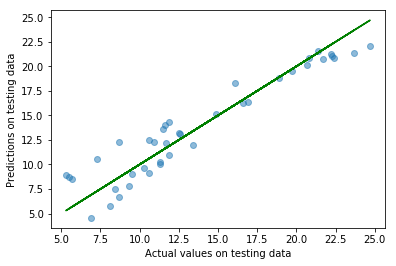

In [12]:
plt.scatter(y_test,regr.predict(X_test), alpha = 0.5)
plt.xlabel("Actual values on testing data")
plt.ylabel("Predictions on testing data")
plt.plot(y_test,y_test, color = 'g')
plt.show()

The plot above shows that the points for the actual values and prediction values are in a linear relationship. Generally, the points are also quite close to the line graph which represents the actual values on the testing data. So, this is a good model, especially since the R^2 value is 0.90.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [144]:
from sklearn import preprocessing
import numpy as np

# The original coefficients before normalising my variables
original_coef = pd.DataFrame(
    data={
        'original coef' : regr.coef_,
        'type': ['TV', 'radio', 'newspaper'] 
    })
original_coef


,original coef,type
0,0.019606,TV
1,0.034943,radio
2,0.001050,newspaper


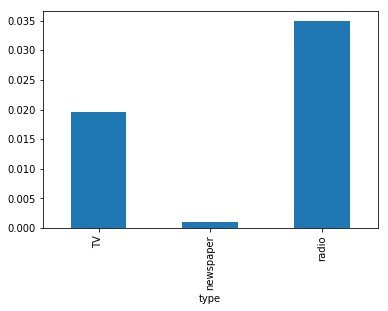

In [145]:
original_coef.groupby('type')['original coef'].mean().plot(kind='bar')

From the bar chart above, it seems like radio contributes the most but i have yet to standardise my data which I would need to since these features are of a different scale.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

In [14]:
# Normalising the data,

X_scaler = preprocessing.StandardScaler().fit(X)
y_scaler = preprocessing.StandardScaler().fit(y.reshape(-1,1)) # reshaping was needed to avoid warnings

scaled_X = X_scaler.transform(X)
scaled_y = y_scaler.transform(y.reshape(-1,1))


scaled_y = scaled_y.ravel()  # This is to turn y back into a vector

scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(
    scaled_X, scaled_y, test_size = 0.20, random_state = 42)

regr.fit(scaled_X_train, scaled_y_train)
scaled_y_pred = regr.predict(scaled_X_test)

scaled_coef = pd.DataFrame(
    data={
        'scaled coef' : regr.coef_,
        'type': ['TV', 'radio', 'newspaper'] 
    })

scaled_coef


/Users/JiaQi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/JiaQi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


,scaled coef,type
0,0.736033,TV
1,0.538374,radio
2,0.011525,newspaper


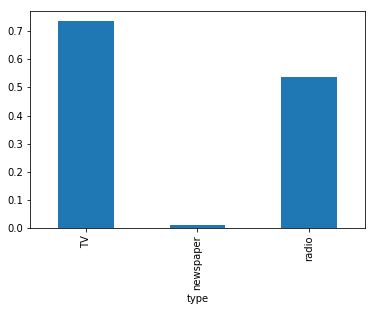

In [15]:
scaled_coef.groupby('type')['scaled coef'].mean().plot(kind='bar')

From the plot above, TV is now instead the one which is most important after standardising my data.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

### Plotting the data in three dimensions

/Users/JiaQi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


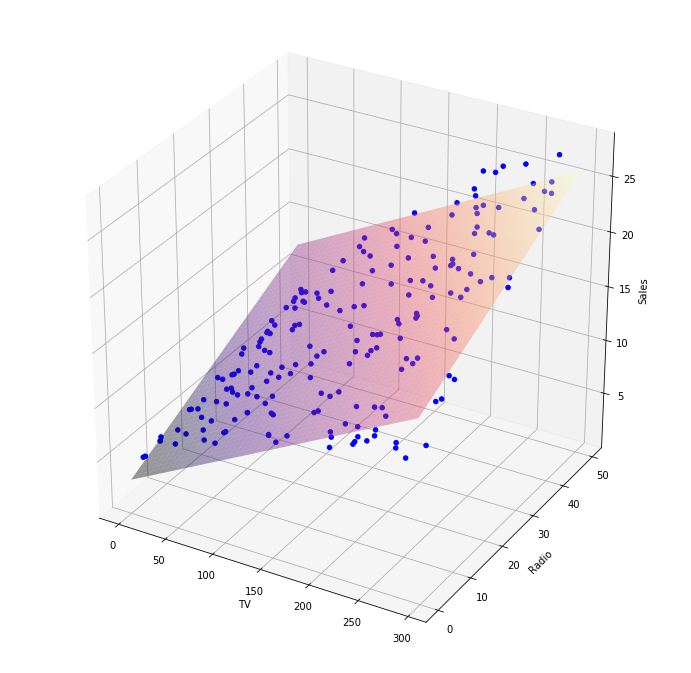

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

new_X = df[['TV', 'radio']] #Since newspaper is not important as shown above
new_y = df['sales']
new_X = sm.add_constant(new_X)
model = sm.OLS(new_y, new_X).fit() 

# To create the regular grid 
X_tv, X_radio = np.meshgrid(np.linspace(X.TV.min(), X.TV.max()), 
                             np.linspace(X.radio.min(), X.radio.max()))

Z = model.params[0] + model.params[1] * X_tv + model.params[2] * X_radio

#create the 3d axes
fig = plt.figure(figsize = (12, 12))
ax = fig.gca(projection='3d')

#Plot hyperplane
ax.plot_surface(X_tv, X_radio, Z, cmap = plt.cm.magma, 
               alpha = 0.4)
ax.scatter(df['TV'], df['radio'], df['sales'],
          c = 'blue', 
          marker = 'o', 
          alpha = 1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()

From the hyperplane I plotted above, there seems to be a non-linear relationship as the points are further from each other on the hyperplane when the advertising costs in radio and TV are larger. This means that there could be overestimation for sales when the radio and TV advertising costs are sufficiently high. 

I would next try to introduce a non-linear term so as to account for this.

### Introducing a non-linear term

In [17]:
new_X['TV*radio'] = new_X['TV'] * new_X['radio']
new_X = new_X[['TV', 'radio', 'TV*radio']]

# Splitting the data randomly,
new_X_train, new_X_test, y_train, y_test = train_test_split(
    new_X, y, test_size = 0.20, random_state = 42)

regr.fit(new_X_train, y_train)

print('R^2 Score: %.2f' % regr.score(new_X_test, y_test))

new_coef = pd.DataFrame(
    data={
        'coef' : regr.coef_,
        'type': ['TV', 'radio', 'TV*radio'] 
    })

new_coef

R^2 Score: 0.97


,coef,type
0,0.019606,TV
1,0.034943,radio
2,0.001050,TV*radio


Text(0,0.5,'Predictions on testing data')

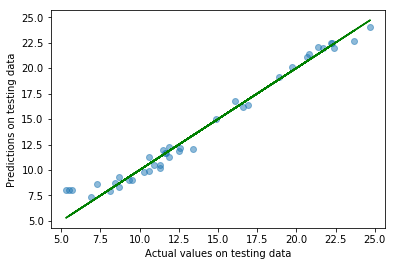

In [18]:
plt.scatter(y_test, regr.predict(new_X_test), alpha = 0.5)
plt.plot(y_test,y_test, color = 'g')
plt.xlabel("Actual values on testing data")
plt.ylabel("Predictions on testing data")

The R^2 value has increased from 0.90 initially to 0.97 now that I have added the interaction term. Additionally, from the plot above, we can also see that the points which are significantly closer to the line graph which represents the actual test results. This indicates that adding the interaction term can improve performance since the predictions look closer to the actual values than before, and the R^2 value has also improved.

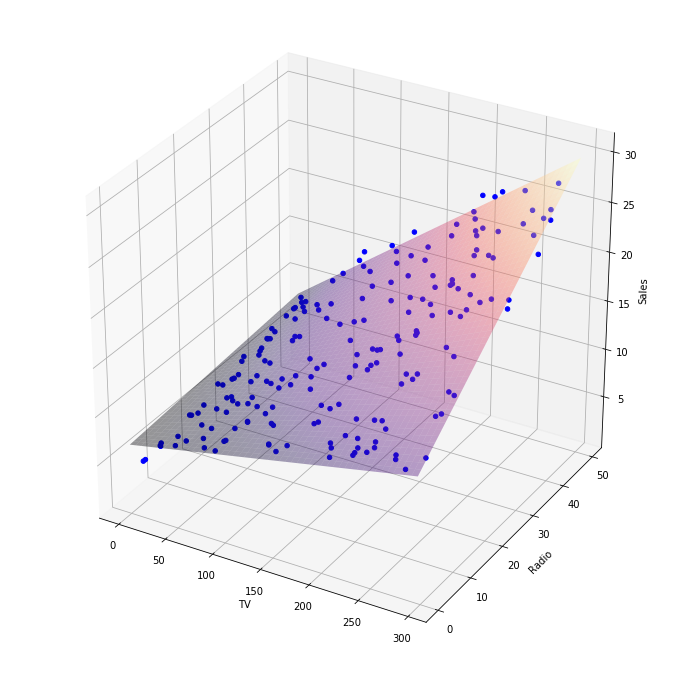

In [19]:
new_X = sm.add_constant(new_X)
model = sm.OLS(new_y, new_X).fit() 

# To create the regular grid 
X_tv, X_radio = np.meshgrid(np.linspace(X.TV.min(), X.TV.max()), 
                             np.linspace(X.radio.min(), X.radio.max()))

new_Z = model.params[0] + model.params[1] * X_tv + model.params[2] * X_radio + model.params[3] * X_tv*X_radio

#create the 3d axes
fig = plt.figure(figsize = (12, 12))
ax = fig.gca(projection='3d')

#Plot hyperplane
ax.plot_surface(X_tv, X_radio, new_Z, cmap = plt.cm.magma, 
               alpha = 0.4)
ax.scatter(df['TV'], df['radio'], df['sales'],
          c = 'blue', 
          marker = 'o', 
          alpha = 1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()

From the 3d plot above, we could see that there is definitely an improvement in this model as compared to the initial one since there are no more obvious areas where the points are spread out. 

I could also try using a non-parametric model to see if that improves performance.

### Using a non-parametric model

R^2 Score: 0.94


Text(0,0.5,'Predictions on testing data')

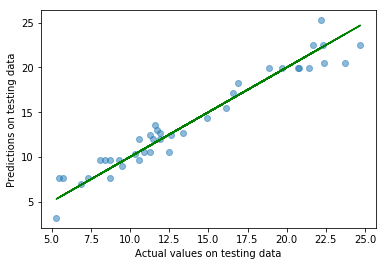

In [23]:
tree_X = df[['TV', 'radio']]

from sklearn.tree import DecisionTreeRegressor

# Splitting the data randomly,
tree_X_train, tree_X_test, y_train, y_test = train_test_split(
    tree_X, y, test_size = 0.20, random_state = 42)

# Using decision trees,
tree_regr = DecisionTreeRegressor(max_depth = 5)
tree_regr.fit(tree_X_train, y_train)

print('R^2 Score: %.2f' % tree_regr.score(tree_X_test, y_test))

plt.scatter(y_test, tree_regr.predict(tree_X_test), alpha = 0.5)
plt.plot(y_test,y_test, color = 'g')
plt.xlabel("Actual values on testing data")
plt.ylabel("Predictions on testing data")

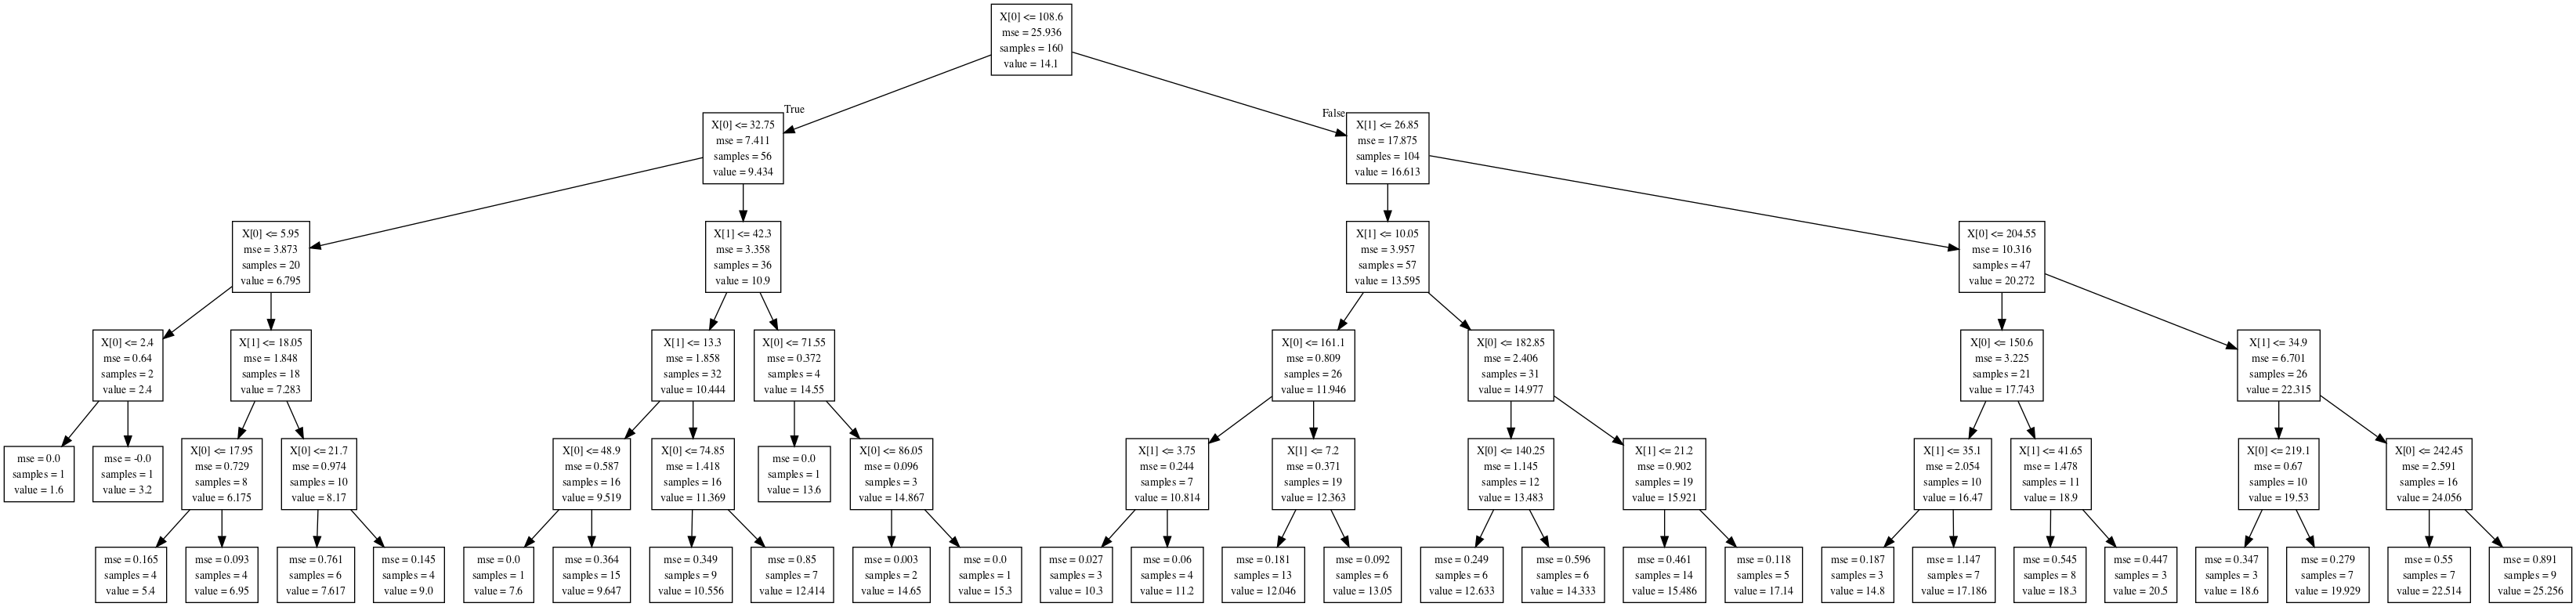

In [40]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image  

dot_data=export_graphviz(tree_regr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


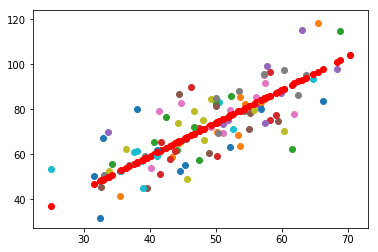

In [74]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate = 0.0001):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


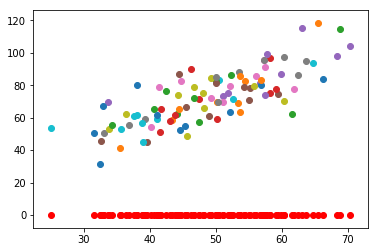

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


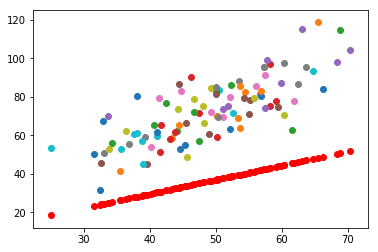

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


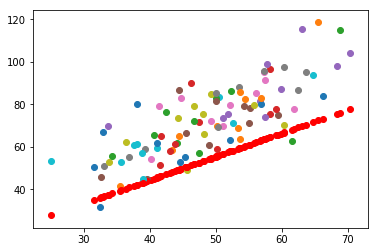

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


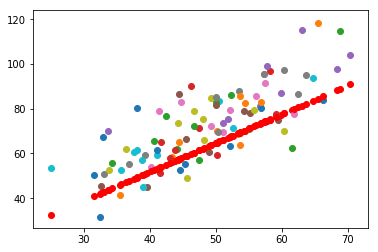

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


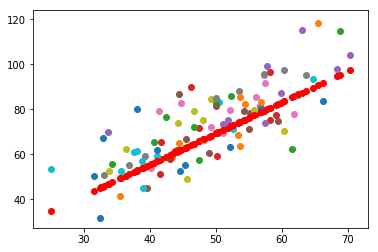

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


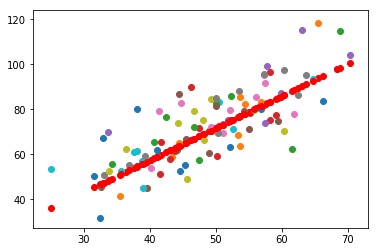

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


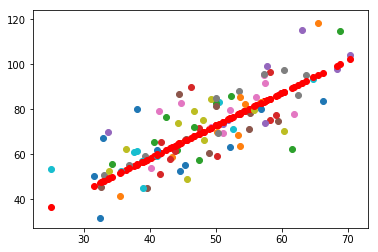

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


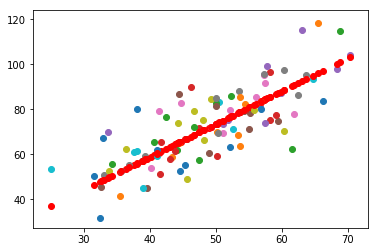

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


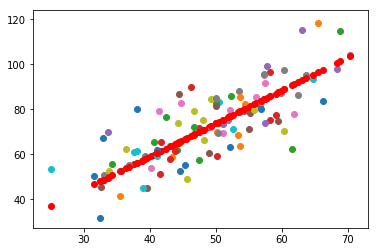

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


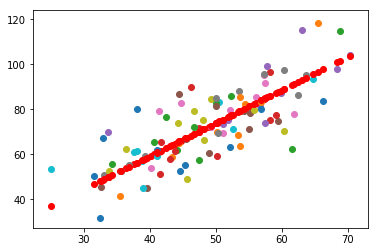

In [75]:
for num in range(0,10):
    run(num)
    plt.show()


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.02963934787473239, m = 1.4774173755483797, error = 112.65585181499746


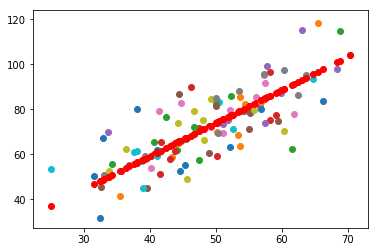

In [95]:
# When the learning rate is 0.0001,
def run(num_iterations, learning_rate = 0.0001):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(10)

As shown in the plot above, when the learning rate is at its default 0.0001, the model converges after 10 iterations.


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = 0.004227923197466066, m = 0.09277834791759343, error = 4902.131329965742


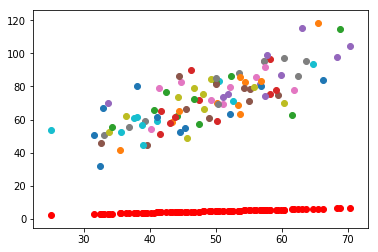

In [105]:
# When I increase the learning rate to become 0.0004,
def run(num_iterations, learning_rate = 0.0004):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(10)

After increasing the learning rate to 0.0004, the model no longer converges after 10 iterations. That is because with a larger learning rate, the algorithm diverges with larger and larger values, which may end up missing the point where it is supposed to converge to a minimum after 10 iterations.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10 iterations b = -1.556023597665339, m = -79.3209440373159, error = 16275190.301098265


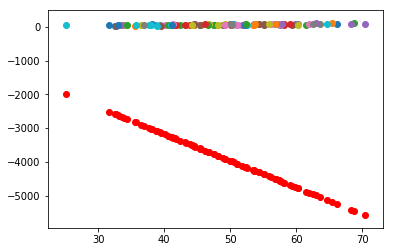

In [97]:
# When I half the learning rate to become 0.00005,
def run(num_iterations, learning_rate = 0.0005):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(10)

As shown in the plot above, when I half the default learning rate such that the learning rate is now 0.0005, the model also does not converge after 10 iterations. This is because it takes a longer time and the algorithm requires more iterations to converge.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

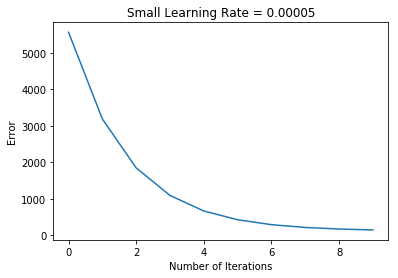

In [133]:
def run(num_iterations, learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = learning_rate
    num_iterations = num_iterations
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    e = compute_error_for_line_given_points(b, m, points)
    return [b,m,e]

low_learning_rate = np.empty([10,1])
for num in range(10):
    result = run(num, 0.00005)
    low_learning_rate[num,0] = result[2]
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Small Learning Rate = 0.00005')
plt.plot(low_learning_rate)

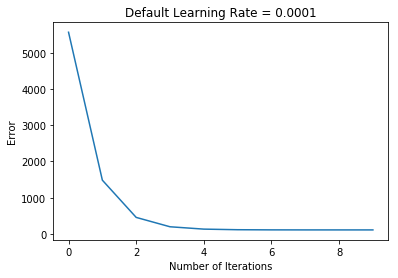

In [134]:
default_learning_rate = np.empty([10,1])
for num in range(10):
    result = run(num, 0.0001)
    low_learning_rate[num,0] = result[2]
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Default Learning Rate = 0.0001')
plt.plot(low_learning_rate)

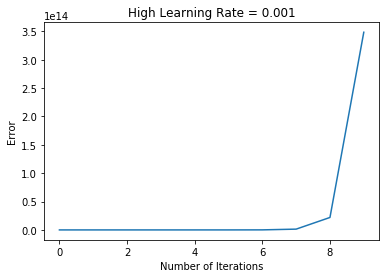

In [141]:
low_learning_rate = np.empty([10,1])
for num in range(10):
    result = run(num, 0.001)
    low_learning_rate[num,0] = result[2]
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('High Learning Rate = 0.001')
plt.plot(low_learning_rate)

From the 3 graphs above, we can see that for the default learning rate of 0.0001, the algorithm would be able to reach convergence and be able to minimize the error within 10 iterations. 

But for the lower learning rate, the slope of the graph is gentler as compared to the default which shows that it takes a longer time for the error to reach its minimum point as compared to the default learning rate.

And finally for the higher learning rate, the error is increasing with each additional iteration instead as there is no convergence since the minimum point has been overshot.